# Yield Curve Analysis

Sources:
1. [PyQuant News](https://twitter.com/pyquantnews/status/1625120952290889728)

In [1]:
# import libraries
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.animation as animation

In [2]:
# import openbb and print version
from openbb_terminal.sdk import openbb

Forecasting Toolkit is disabled. To use the Forecasting features please install the toolkit following the instructions here: https://docs.openbb.co/sdk/quickstart/installation/

Portfolio Optimization Toolkit is disabled. To use the Optimization features please install the toolkit following the instructions here: https://docs.openbb.co/sdk/quickstart/installation/

In [3]:
# set maturities
maturities = ['3m', '6m', '1y', '2y', '3y',
              '5y', '7y', '10y', '30y']
data = openbb.economy.treasury(
    instruments=['nominal'],
    maturities=maturities,
    start_date='1999-01-01'
)
data.columns = maturities

In [4]:
# preview data
data.head()

,3m,6m,1y,2y,3y,5y,7y,10y,30y
TIME_PERIOD,,,,,,,,,
1999-01-01,4.45,4.49,4.51,4.62,4.61,4.60,4.80,4.72,5.16
1999-02-01,4.56,4.61,4.70,4.88,4.90,4.91,5.10,5.00,5.37
1999-03-01,4.57,4.65,4.78,5.05,5.11,5.14,5.36,5.23,5.58
1999-04-01,4.41,4.54,4.69,4.98,5.03,5.08,5.28,5.18,5.55
1999-05-01,4.63,4.75,4.85,5.25,5.33,5.44,5.64,5.54,5.81


In [5]:
# identify inverted yield curves
data['inverted'] = data['30y'] < data['3m']

## Visualize

Text(0.5, 0, 'Time to maturity')

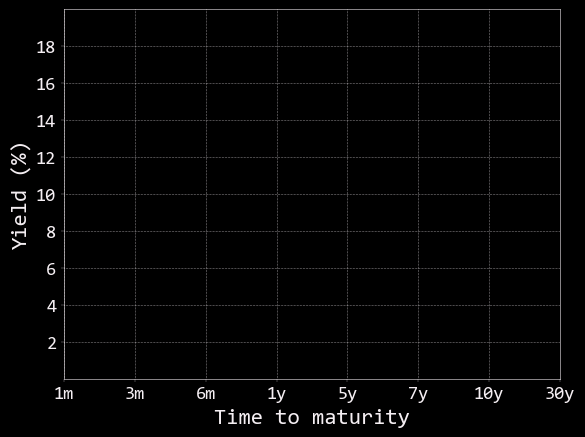

In [6]:
# set up figure
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line, = ax.plot([],[])

# set range of ticks
ax.set_xlim(0,7)
ax.set_ylim(0,20)

# set tick locations
ax.set_xticks(range(8))
ax.set_yticks([2,4,6,8,10,12,14,16,18])

# set axis labels
ax.set_xticklabels(['1m', '3m', '6m', '1y', '5y',
                    '7y', '10y', '30y'])
ax.set_yticklabels([2,4,6,8,10,12,14,16,18])

# face y axis labels to the left
ax.yaxis.set_label_position('left')
ax.yaxis.tick_left()

# add axis labels
plt.ylabel('Yield (%)')
plt.xlabel('Time to maturity')

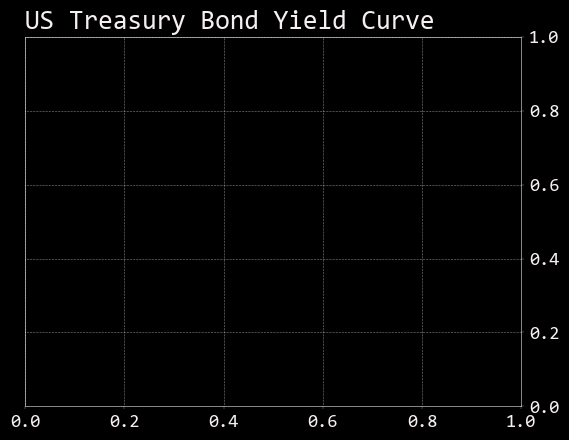

In [7]:
# create animated plot
def init_func():
    line.set_data([],[])
    plt.title('US Treasury Bond Yield Curve')
    return line,

def animate(i):
    x = range(0, len(maturities))
    y = data[maturities].iloc[i]
    dt_ = data.index[i].strftime("%Y-%m-%d")
    
    if data.inverted.iloc[i]:
        line.set_color('r')
    else:
        line.set_color('y')
    line.set_data(x,y)
    plt.title(f'US Treasure Bond Yield Curve ({dt_})')
    return line,

ani = animation.FuncAnimation(
    fig, animate, init_func=init_func, 
    frames=len(data.index), interval=5,
    blit=True
)